In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium 
from folium.plugins import HeatMap

In [3]:
# Importing the Building and Property Violations Dataset
# Converting all Contact City values in the dataframe to upper case

vio = pd.read_csv("BUILDING AND PROPERTY VIOLATIONS.csv")
vio['contact_city'] = vio['contact_city'].str.upper()
vio.head(2)

case_no          status_dttm status          code  value  \
0  HVIOL-644882  2022-11-18 09:50:19   Open  CMR410.550 B    NaN   
1  HVIOL-644882  2022-11-18 09:50:19   Open  CMR410.482 A    NaN   

                                         description violation_stno  \
0  Extermination of Insects, Rodents and Skunks -...             19   
1  Smoke Detectors & Carbon Monoxide Alarms - Own...             19   

  violation_sthigh violation_street violation_suffix  ... ward  \
0              NaN            Adams               ST  ...   15   
1              NaN            Adams               ST  ...   15   

      contact_addr1 contact_addr2 contact_city contact_state contact_zip  \
0  77 Pond Ave #401           NaN    BROOKLINE            MA       02445   
1  77 Pond Ave #401           NaN    BROOKLINE            MA       02445   

   sam_id latitude longitude                                 location  
0  175531  42.3076  -71.0634  (42.30760000002404, -71.06340000126664)  
1  175531  42.3076  -71.0634  (42.30760000002404, -71.06340000126664)  

[2 rows x 23 columns]

In [4]:
# Importing the Climate Ready Boston Social Vulnerability Dataset

vulnerable = pd.read_csv("Climate_Ready_Boston_Social_Vulnerability.csv")
vulnerable['Name'] = vulnerable['Name'].str.upper()
vulnerable.head(2)

FID      GEOID10   AREA_SQFT  AREA_ACRES  POP100_RE  HU100_RE  TotDis  \
0    1  25025010405  3914567.54     89.8661       5522       994     470   
1    2  25025010404  1472713.92     33.8089       5817      1862     299   

   TotChild  OlderAdult  Low_to_No   LEP  POC2  MedIllnes          Name  \
0        60         331       1191  1522  1755    2131.22  MISSION HILL   
1        77          56       2387  2443  1749    2201.14        FENWAY   

     Shape__Area  Shape__Length  
0  666100.000000    6036.192907  
1  250612.382812    2176.592171

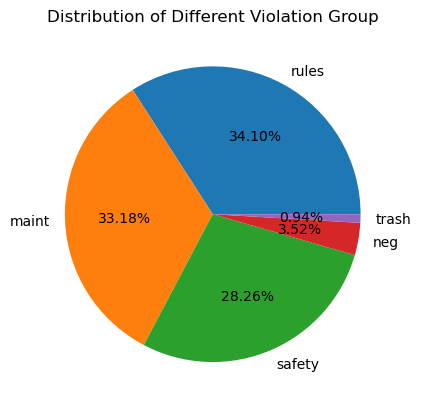

In [5]:
# Importing the code for each violation group
# Merging the code and violation dataframe and plotting a pie chart for each type of violation based on its percentage

code = pd.read_csv("codes.csv")
vio_ = pd.merge(vio, code, left_on='code', right_on='Code')
r = vio_['ViolationGroup'].value_counts()

fig = plt.figure()
plt.pie(r.values, labels = r.index, autopct = '%1.2f%%')
plt.title("Distribution of Different Violation Group")
plt.show()
#plt.savefig("Distribution of Different Violation Group")

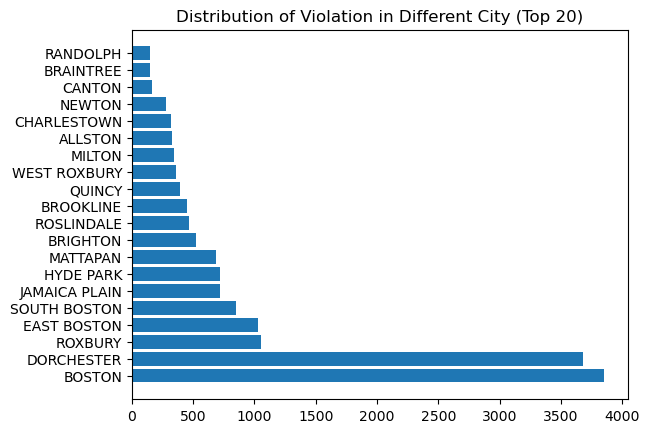

<Figure size 640x480 with 0 Axes>

In [6]:
# Plotting graph for total no. of violations per Boston Neighborhood

violation_in_each_contact_city = vio['contact_city'].value_counts()
v20 = violation_in_each_contact_city.head(20)

fig = plt.figure()
plt.barh(v20.index, v20.values)
plt.title("Distribution of Violation in Different City (Top 20)")
plt.show()
plt.savefig("Distribution of Violation in Different City (Top 20)")

In [7]:
# Extracting the Top 20 neighborhoods with highest number of violations and getting their names (using x.keys())

x = vio['contact_city'].value_counts()[:20]
y = vio['contact_city'].value_counts()
a = x.keys()

In [8]:
# Finding the total no. of houses in the Building and Property Violations Dataset

summ = 0.0
for i in range(len(y)):
    summ+=y[i]
summ

21715.0

In [9]:
# Finding the percentage of violations in these Top 20 neighborhoods with most violations

percts = []
for i in range(len(x)):
    percts.append((x[i]/summ)*100)

In [10]:
# Printing those percentages

percts

[17.748100391434495,
 16.965231406861616,
 4.835367257655998,
 4.738659912502878,
 3.923555146212296,
 3.3294957402717014,
 3.3064701819019113,
 3.149896384987336,
 2.4268938521759154,
 2.1505871517384296,
 2.0584849182592677,
 1.8005986645176146,
 1.6532350909509557,
 1.579553304167626,
 1.524291964080129,
 1.4690306239926318,
 1.289431268708266,
 0.7460280911812112,
 0.6815565277457979,
 0.6723463043978816]

<BarContainer object of 20 artists>

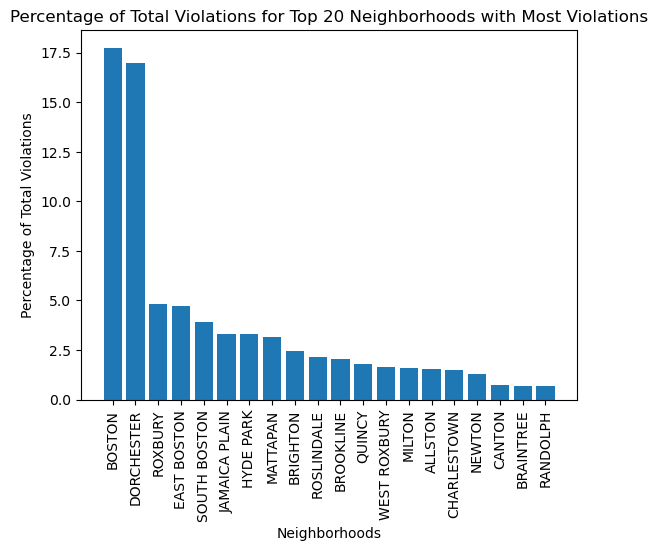

In [11]:
# Plotting the percentage of violations for the Top 20 neighbothoods with highest violations in Boston City

plt.xticks(rotation = 90)
plt.xlabel("Neighborhoods")
plt.ylabel("Percentage of Total Violations")
plt.title("Percentage of Total Violations for Top 20 Neighborhoods with Most Violations")
plt.bar(a, percts)

In [12]:
# Printing the head of the Boston Violation Dataset

vio.head()

case_no          status_dttm status          code  value  \
0  HVIOL-644882  2022-11-18 09:50:19   Open  CMR410.550 B    NaN   
1  HVIOL-644882  2022-11-18 09:50:19   Open  CMR410.482 A    NaN   
2  HVIOL-644882  2022-11-18 09:50:19   Open  CRM410.550 D    NaN   
3  HVIOL-644882  2022-11-18 09:50:19   Open  CMR410.550 B    NaN   
4  HVIOL-644882  2022-11-18 09:50:19   Open  CMR410.351 A    NaN   

                                         description violation_stno  \
0  Extermination of Insects, Rodents and Skunks -...             19   
1  Smoke Detectors & Carbon Monoxide Alarms - Own...             19   
2  Extermination of Insects, Rodents and Skunks -...             19   
3  Extermination of Insects, Rodents and Skunks -...             19   
4  Owners Installation/Maintenance Responsibility...             19   

  violation_sthigh violation_street violation_suffix  ... ward  \
0              NaN            Adams               ST  ...   15   
1              NaN            Adams               ST  ...   15   
2              NaN            Adams               ST  ...   15   
3              NaN            Adams               ST  ...   15   
4              NaN            Adams               ST  ...   15   

      contact_addr1 contact_addr2 contact_city contact_state contact_zip  \
0  77 Pond Ave #401           NaN    BROOKLINE            MA       02445   
1  77 Pond Ave #401           NaN    BROOKLINE            MA       02445   
2  77 Pond Ave #401           NaN    BROOKLINE            MA       02445   
3  77 Pond Ave #401           NaN    BROOKLINE            MA       02445   
4  77 Pond Ave #401           NaN    BROOKLINE            MA       02445   

   sam_id latitude longitude                                 location  
0  175531  42.3076  -71.0634  (42.30760000002404, -71.06340000126664)  
1  175531  42.3076  -71.0634  (42.30760000002404, -71.06340000126664)  
2  175531  42.3076  -71.0634  (42.30760000002404, -71.06340000126664)  
3  175531  42.3076  -71.0634  (42.30760000002404, -71.06340000126664)  
4  175531  42.3076  -71.0634  (42.30760000002404, -71.06340000126664)  

[5 rows x 23 columns]

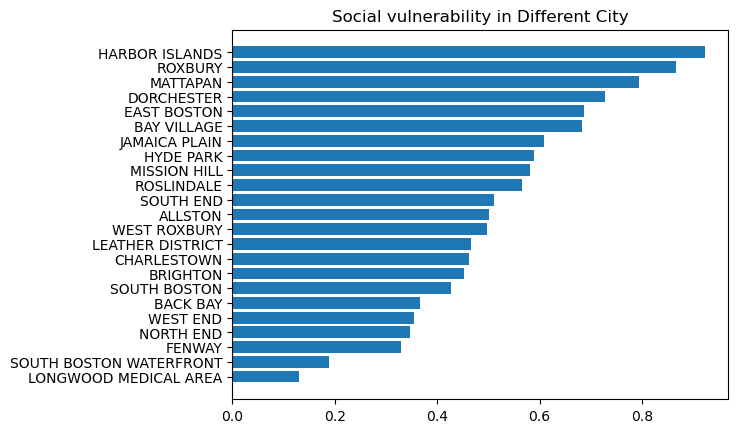

<Figure size 640x480 with 0 Axes>

In [14]:
# Plotting a graph for the Social Vulnerability Scores per neighborhood in Boston city

vulnerable['Total_v'] = vulnerable['TotDis'] + vulnerable['TotChild'] + vulnerable['OlderAdult'] + vulnerable['Low_to_No'] + vulnerable['LEP'] + vulnerable['POC2'] + vulnerable['MedIllnes']

pop_each_area = vulnerable.groupby(by=vulnerable['Name'])['POP100_RE'].sum()
vul_each_area = vulnerable.groupby(by=vulnerable['Name'])['Total_v'].sum()

dic = {'Name': pop_each_area.index, 'Pop': pop_each_area.values, 'Vul': vul_each_area.values}
d = pd.DataFrame(dic)
d['Social vulnerability'] = (d['Vul']/d['Pop'] - 0.5)/2.5
d.sort_values(by='Social vulnerability' , ascending=True, inplace=True)

fig = plt.figure()
plt.barh(d['Name'], d['Social vulnerability'])
plt.title("Social vulnerability in Different City")
plt.show()
plt.savefig("Social vulnerability in Different City")


In [16]:
# Printing the number of vulnerable people per neighborhood in Boston city

vulnerable.groupby(by='Name')['Total_v'].sum()

Name
ALLSTON                     13303.85
BACK BAY                    40493.96
BAY VILLAGE                 23951.93
BRIGHTON                    99278.80
CHARLESTOWN                 27214.47
DORCHESTER                 161599.76
EAST BOSTON                 89818.60
FENWAY                      35935.74
HARBOR ISLANDS               1501.53
HYDE PARK                   32721.46
JAMAICA PLAIN               85449.57
LEATHER DISTRICT             9827.59
LONGWOOD MEDICAL AREA        4023.08
MATTAPAN                    82344.87
MISSION HILL                44067.93
NORTH END                   23094.86
ROSLINDALE                 116705.32
ROXBURY                    207474.10
SOUTH BOSTON                34553.16
SOUTH BOSTON WATERFRONT      5975.93
SOUTH END                   29176.80
WEST END                     9514.82
WEST ROXBURY                40045.90
Name: Total_v, dtype: float64

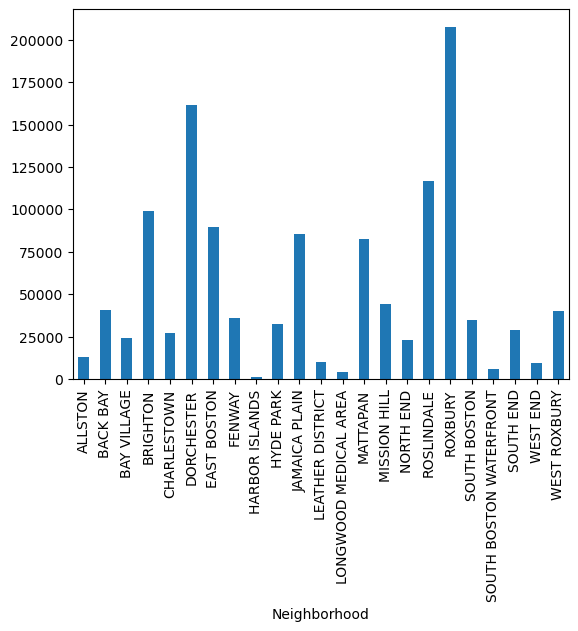

In [17]:
# Plotting the number of vulnerable people per neighborhood in Boston city

#plt.plot(vulnerable['Name'].unique(), , kind='bar')
vulnerable.groupby(by='Name')['Total_v'].sum().plot(kind = 'bar')
plt.xlabel("Neighborhood")
plt.show()

In [18]:
# Calculating and assigning each neighborhood a vulnerability rank based on their Social Vulnerability values

# Social Vulnerability Rank (1: most vulnerable, 23: least vulnerable)
d['Vulnerability_rank'] = d['Social vulnerability'].rank(method = 'first', ascending=False).values
d.head(10)

Name    Pop       Vul  Social vulnerability  \
12    LONGWOOD MEDICAL AREA   4861   4023.08              0.131050   
19  SOUTH BOSTON WATERFRONT   6135   5975.93              0.189629   
7                    FENWAY  27138  35935.74              0.329674   
15                NORTH END  16880  23094.86              0.347272   
21                 WEST END   6853   9514.82              0.355367   
1                  BACK BAY  28634  40493.96              0.365677   
18             SOUTH BOSTON  22067  34553.16              0.426332   
3                  BRIGHTON  60821  99278.80              0.452924   
4               CHARLESTOWN  16439  27214.47              0.462193   
11         LEATHER DISTRICT   5902   9827.59              0.466052   

    Vulnerability_rank  
12                23.0  
19                22.0  
7                 21.0  
15                20.0  
21                19.0  
1                 18.0  
18                17.0  
3                 16.0  
4                 15.0  
11                14.0

In [19]:
# Creating a DataFrame with each neighborhood, the number of violations in that neighborhood, and its violation rank

# Violation Rank (1: with )
dicV = {'Name': violation_in_each_contact_city.index, 'Vio_num':violation_in_each_contact_city.values}
v = pd.DataFrame(dicV)
v['Violation_rank'] = v['Vio_num'].rank(method = 'first', ascending=False).values
v.head(10)

Name  Vio_num  Violation_rank
0         BOSTON     3854             1.0
1     DORCHESTER     3684             2.0
2        ROXBURY     1050             3.0
3    EAST BOSTON     1029             4.0
4   SOUTH BOSTON      852             5.0
5  JAMAICA PLAIN      723             6.0
6      HYDE PARK      718             7.0
7       MATTAPAN      684             8.0
8       BRIGHTON      527             9.0
9     ROSLINDALE      467            10.0

In [20]:
# Merging both the above datasets to contain both vulnerability and violation data

rank = pd.merge(d, v, left_on='Name', right_on='Name')
rank

Name    Pop        Vul  Social vulnerability  Vulnerability_rank  \
0    SOUTH BOSTON  22067   34553.16              0.426332                17.0   
1        BRIGHTON  60821   99278.80              0.452924                16.0   
2     CHARLESTOWN  16439   27214.47              0.462193                15.0   
3    WEST ROXBURY  22952   40045.90              0.497907                13.0   
4         ALLSTON   7592   13303.85              0.500940                12.0   
5      ROSLINDALE  60973  116705.32              0.565620                10.0   
6    MISSION HILL  22576   44067.93              0.580793                 9.0   
7       HYDE PARK  16585   32721.46              0.589182                 8.0   
8   JAMAICA PLAIN  42251   85449.57              0.608971                 7.0   
9     EAST BOSTON  40517   89818.60              0.686725                 5.0   
10     DORCHESTER  69695  161599.76              0.727468                 4.0   
11       MATTAPAN  33103   82344.87              0.795014                 3.0   
12        ROXBURY  77812  207474.10              0.866540                 2.0   

    Vio_num  Violation_rank  
0       852             5.0  
1       527             9.0  
2       319            16.0  
3       359            13.0  
4       331            15.0  
5       467            10.0  
6         6           196.0  
7       718             7.0  
8       723             6.0  
9      1029             4.0  
10     3684             2.0  
11      684             8.0  
12     1050             3.0

In [20]:
# Dropping Mission Hill since it is also an outlier w.r.t. Violation Rank and creating three lists for Neighborhood Name,
# vulnerability rank of each neighborhood, and violation rank of each neighborhood

rank = rank.drop(index = [6])
name_list = rank['Name']
vul_list = rank['Vulnerability_rank']
vio_list = rank['Violation_rank']

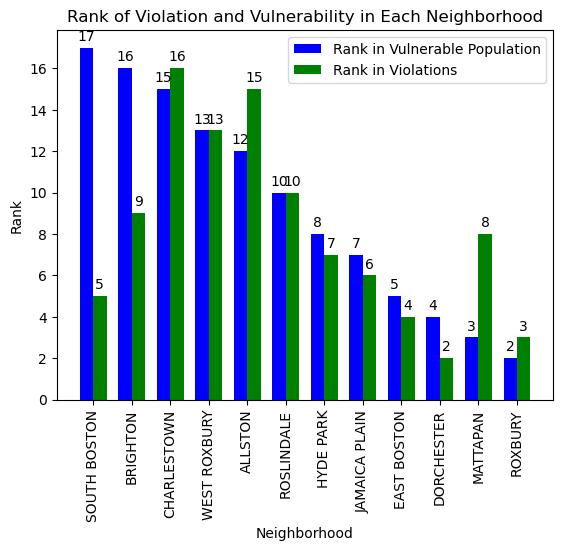

In [21]:
# Plotting a bar graph showcasing the vulnerability rank and violation rank of each neighborhood side by side

x = np.arange(len(name_list))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, vul_list, width, label = 'Rank in Vulnerable Population', fc = 'b')
rects2 = ax.bar(x+width/2, vio_list, width, label = 'Rank in Violations', fc = 'g')

ax.set_ylabel('Rank')
ax.set_xlabel('Neighborhood')
ax.set_title('Rank of Violation and Vulnerability in Each Neighborhood')
ax.set_xticks(x)
ax.set_xticklabels(name_list)
ax.legend()

def autolabels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                   xy =(rect.get_x()+rect.get_width()/2, height),
                   xytext = (0,3),
                   textcoords = 'offset points',
                   ha = 'center',
                   va = 'bottom')
autolabels(rects1)
autolabels(rects2)

plt.xticks(rotation = 90)

#fig.tight_layout()
plt.show()